In [14]:
import os
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from PIL import Image
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [2]:
encoder = OneHotEncoder()
encoder.fit([[0], [1]])

# 0 - Tumor
# 1 - Normal

OneHotEncoder()

In [3]:

data = []
paths = []
result = []

for r, d, f in os.walk(r'/content/drive/MyDrive/brain_tumor_dataset/yes'):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

In [4]:
paths = []
for r, d, f in os.walk(r"/content/drive/MyDrive/brain_tumor_dataset/no"):
    for file in f:
        if '.jpg' in file:
            paths.append(os.path.join(r, file))

for path in paths:
    img = Image.open(path)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

In [5]:
data = np.array(data)
data.shape

(139, 128, 128, 3)

In [6]:
result = np.array(result)
result = result.reshape(139,2)

In [7]:
x_train,x_test,y_train,y_test = train_test_split(data, result, test_size=0.2, shuffle=True, random_state=0)

In [8]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(2, 2), input_shape=(128, 128, 3), padding = 'Same'))
model.add(Conv2D(32, kernel_size=(2, 2),  activation ='relu', padding = 'Same'))


model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))
model.add(Conv2D(64, kernel_size = (2,2), activation ='relu', padding = 'Same'))

model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())

model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(2, activation='softmax'))

In [9]:
model.compile(loss = "categorical_crossentropy", optimizer='Adamax')

print(model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 128, 128, 32)      416       
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization (Batch  (None, 128, 128, 32)      128       
 Normalization)                                                  
                                                                 
 max_pooling2d (MaxPooling2  (None, 64, 64, 32)        0         
 D)                                                              
                                                                 
 dropout (Dropout)           (None, 64, 64, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 64)        8

In [10]:
y_train.shape

(111, 2)

In [11]:
history = model.fit(x_train, y_train, epochs = 20, batch_size = 40, verbose = 1,validation_data = (x_test, y_test))

Epoch 1/20
3/3 [==============================] - 12s 3s/step - loss: 42.2514 - val_loss: 35.0304
Epoch 2/20
3/3 [==============================] - 11s 4s/step - loss: 6.8446 - val_loss: 6.9076
Epoch 3/20
3/3 [==============================] - 8s 2s/step - loss: 3.3712 - val_loss: 4.1464
Epoch 4/20
3/3 [==============================] - 9s 3s/step - loss: 2.0593 - val_loss: 6.6869
Epoch 5/20
3/3 [==============================] - 9s 3s/step - loss: 2.2117 - val_loss: 3.6419
Epoch 6/20
3/3 [==============================] - 8s 2s/step - loss: 0.9357 - val_loss: 3.0544
Epoch 7/20
3/3 [==============================] - 9s 3s/step - loss: 0.1851 - val_loss: 5.3661
Epoch 8/20
3/3 [==============================] - 7s 2s/step - loss: 0.6715 - val_loss: 5.6307
Epoch 9/20
3/3 [==============================] - 9s 3s/step - loss: 0.2928 - val_loss: 4.3747
Epoch 10/20
3/3 [==============================] - 7s 2s/step - loss: 0.0446 - val_loss: 3.8452
Epoch 11/20
3/3 [============================

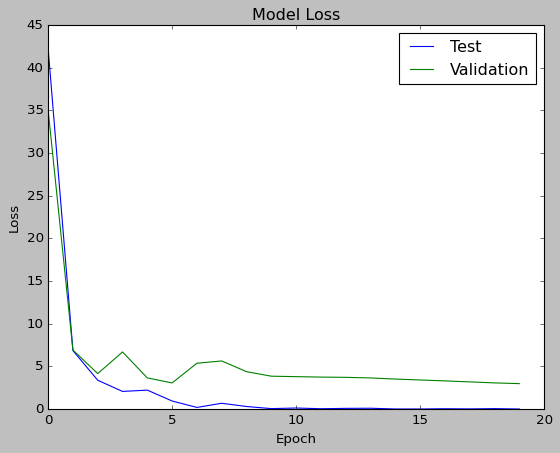

In [17]:
plt.style.use('classic')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Test', 'Validation'], loc='upper right')
plt.show()

In [18]:
def names(number):
    if number==0:
        return 'Tumor'
    else:
        return 'No_Tumor'

100.0%No_Tumor


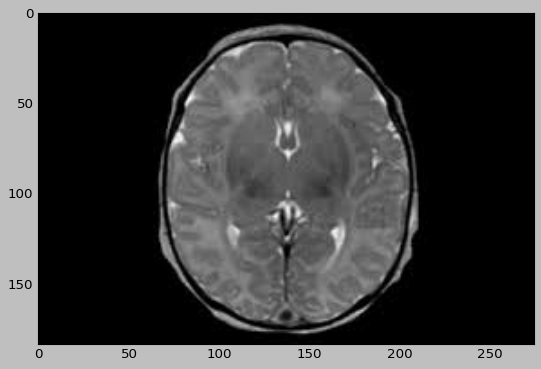

In [25]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/no/12 no.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '%' + names(classification))

99.99927282333374% Tumor


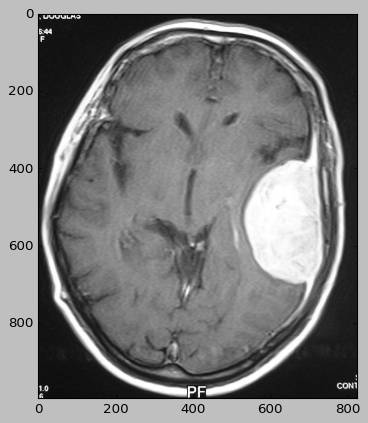

In [26]:
from matplotlib.pyplot import imshow
img = Image.open(r"/content/drive/MyDrive/brain_tumor_dataset/yes/Y103.jpg")
x = np.array(img.resize((128,128)))
x = x.reshape(1,128,128,3)
res = model.predict_on_batch(x)
classification = np.where(res == np.amax(res))[1][0]
imshow(img)
print(str(res[0][classification]*100) + '% ' + names(classification))